In [1]:
#Importing required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Importing Data
data=pd.read_csv('Assignment1_gene_data-2.csv',index_col=0)
meta=pd.read_csv('Assignment1_Meta-2.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Reviewing data
data.head()

,symbol,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
1,Zzz3,253.401685,402.8508776,230.957463,688.486264,358.067836,344.962350,441.155001,301.149694,390.361685,...,507.882774,465.081486,415.478767,297.061149,488.848114,367.912141,307.199908,347.802509,411.227261,283.709694
2,Zzef1,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
3,Zyx,40.578958,49.23516006,59.472005,46.212152,61.969671,55.732843,53.819870,54.315691,73.016585,...,33.512262,36.751853,36.952457,35.718610,27.346198,32.647887,42.006833,32.324596,41.426033,32.754971
4,Zyg11b,26.373102,35.00190057,32.389728,34.932372,35.192365,33.858459,27.948378,21.152797,32.283053,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
5,Zyg11a,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797


In [4]:
#Reviewing data
meta.head()

,sIdx,Time,Unit
0,S1,9,Hours
1,S2,9,Hours
2,S3,9,Hours
3,S4,7,Hours
4,S5,7,Hours


In [5]:
#Dropping Unit Column since it is of no use, setting index sample ID's and renaming it to 'sample'
meta=meta.drop(['Unit'],axis=1)
meta.set_index(['sIdx'],inplace=True)
meta.index.name='sample'
meta

,Time
sample,
S1,9
S2,9
S3,9
S4,7
S5,7
S6,7
S7,5
S8,5
S9,5


In [6]:
#Extracting mentioned genes for the problem; Lgals4 and Kif2c
gene1=data.loc[data['symbol'] == 'Lgals4']
gene2=data.loc[data['symbol'] == 'Kif2c']
display(gene1)
display(gene2)

,symbol,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
11629,Lgals4,445.324993,328.8365556,247.98361,307.191034,210.447295,277.89869,148.343061,122.538226,180.271964,...,267.021673,205.652522,217.237837,261.215399,211.316263,174.312766,247.555337,214.319194,156.757161,175.892889


,symbol,S1,S2,S3,S4,S5,S6,S7,S8,S9,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
12075,Kif2c,32.795454,24.35696874,21.152797,28.315431,35.192365,30.720765,42.523543,28.576088,25.583949,...,21.152797,21.152797,21.152797,21.152797,21.152797,28.785062,28.473818,27.349568,21.152797,26.356528


In [7]:
#Converting the data for gene1 into column, removing unwanted row and setting index as 'sample' which is same for meta data
gene1=gene1.transpose()
gene1=gene1.drop(gene1.index[0])
gene1.index.name='sample'
gene1.columns=['Lgals4']
gene1

,Lgals4
sample,
S1,445.325
S2,328.8365556
S3,247.984
S4,307.191
S5,210.447
S6,277.899
S7,148.343
S8,122.538
S9,180.272


In [8]:
#Converting the data for gene2 into column, removing unwanted row and setting index as 'sample' which is same for meta data
gene2=gene2.transpose()
gene2=gene2.drop(gene2.index[0])
gene2.index.name='sample'
gene2.columns=['Kif2c']
gene2

,Kif2c
sample,
S1,32.7955
S2,24.35696874
S3,21.1528
S4,28.3154
S5,35.1924
S6,30.7208
S7,42.5235
S8,28.5761
S9,25.5839


In [9]:
#Combining all the dataframes into one single dataset for visualisation
data=pd.concat([meta['Time'],gene1['Lgals4'],gene2['Kif2c']],axis=1)
data

,Time,Lgals4,Kif2c
sample,,,
S1,9,445.325,32.7955
S2,9,328.8365556,24.35696874
S3,9,247.984,21.1528
S4,7,307.191,28.3154
S5,7,210.447,35.1924
S6,7,277.899,30.7208
S7,5,148.343,42.5235
S8,5,122.538,28.5761
S9,5,180.272,25.5839


In [10]:
data.index

Index(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11',
       'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21',
       'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30'],
      dtype='object', name='sample')

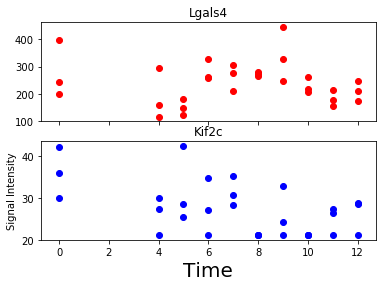

In [11]:
#Scatter Plot
plt.figure(1)
fig,ax= plt.subplots(2,sharex=True)
ax[0].scatter(data['Time'],data['Lgals4'],color='r')
ax[0].set_title('Lgals4')
ax[1].scatter(data['Time'],data['Kif2c'], color='b')
ax[1].set_title('Kif2c')
plt.xlabel('Time', fontsize=20)
plt.ylabel('Signal Intensity',fontsize=10)
fig

In [12]:
#To clear the plots
plt.gcf().clear()

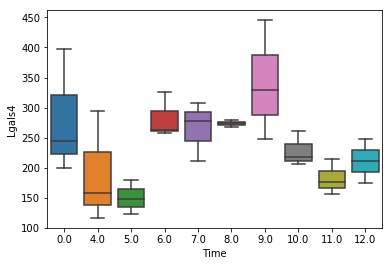

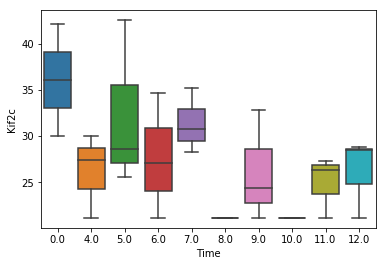

In [13]:
#Box Plot
plt.figure(2)
x=data['Time'].astype(np.float)
y=data['Lgals4'].astype(np.float)
z=data['Kif2c'].astype(np.float)
sns.boxplot(x=x, y=y, data=data)
plt.show()
sns.boxplot(x=x,y=z,data=data)
plt.show()

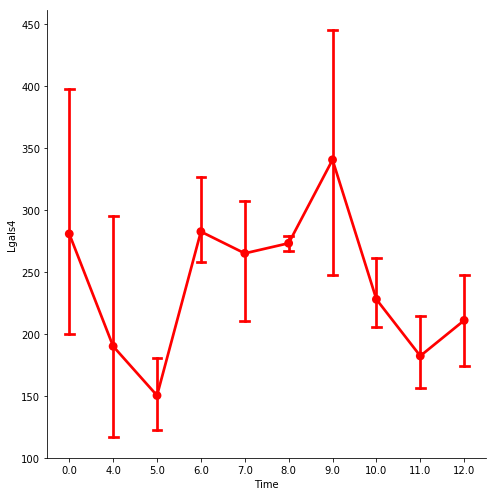

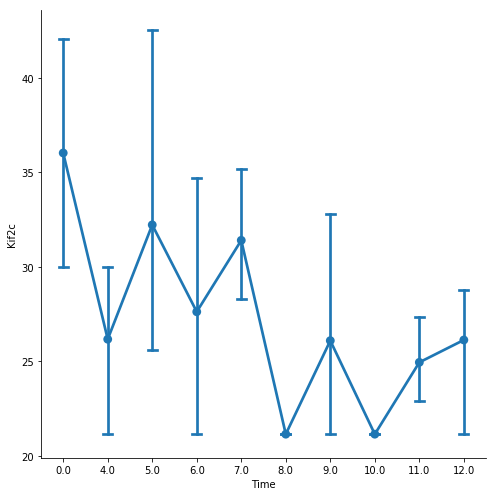

In [46]:
#Factor Plot
data=data.astype(np.float)
g=sns.factorplot(x='Time',y='Lgals4',data=data,size=7, capsize=.2, color='r', markers=["o"])
g=sns.factorplot(x='Time',y='Kif2c', data=data, size=7, capsize=.2,  markers=["o"])
plt.show()